<h1> American Airlines 2022 Flights (Exploratory Data Analysis)</h1>
<p>
<img src="https://www.aa.com/content/images/customer-service/about-us/inclusion-diversity/supplier-diversity-banner.jpg" alt="Airport Waiting Room">
</p>

<h2>1. Introduction</h2>

<p>This study's goal was to identify trends in flight delays/cancellations that an airline could use to handle those situation better; fewer delays/cancellations translate into more satisfied passengers, better press, and ultimately more profits. My purpose is to produce high-quality numbers for the EDA, with information that would be clear to see at a glance. Since graphics are undoubtedly the most effective instrument for achieving that objective, it would seem vital to become proficient in visualization techniques.<br>
    
All data for this study come from https://www.kaggle.com/datasets/jl8771/2022-us-airlines-domestic-departure-data. This dataset contains compiled data of US domestic flight take off data, combined with airport data, aircraft data, and present weather data in 2022. However, we will only be using American Airlines data for this particular study.<br>
    
These are some of the questions I have, and at the end of our research, we should be able to answer them.<br>
    <ul>
        <li>Is there a period of year when delays are more frequent?</li>
        <li>Do any cancelation or delay times seem too long? If so, how come?</li>
        <li>What suggestions do we have for improving the situation?</li>
    </ul>
</p>


<p><strong>Acknowledgement:</strong> Much appreciation to <strong><em>Hoang Hai Nguyen</em></strong> for his guidance and assistance in composing this notebook.</p>

<h2>2. Preparing the data</h2>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.ticker as ticker 
import seaborn as sns

In [2]:
main_file = "CompleteData.csv"
cancellation_file = "Cancellation.csv"
complete_df = pd.read_csv(main_file)
cancellation_df = pd.read_csv(cancellation_file)

In [3]:
complete_df.columns

Index(['FL_DATE', 'DEP_HOUR', 'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'CRS_DEP_TIME', 'TAXI_OUT', 'DEP_DELAY', 'AIR_TIME',
       'DISTANCE', 'CANCELLED', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'MESONET_STATION', 'YEAR OF MANUFACTURE', 'MANUFACTURER', 'ICAO TYPE',
       'RANGE', 'WIDTH', 'WIND_DIR', 'WIND_SPD', 'WIND_GUST', 'VISIBILITY',
       'TEMPERATURE', 'DEW_POINT', 'REL_HUMIDITY', 'ALTIMETER',
       'LOWEST_CLOUD_LAYER', 'N_CLOUD_LAYER', 'LOW_LEVEL_CLOUD',
       'MID_LEVEL_CLOUD', 'HIGH_LEVEL_CLOUD', 'CLOUD_COVER', 'ACTIVE_WEATHER'],
      dtype='object')

<h2>3. Cleaning</h2>

<p>Drop columns that will not be used</p>

In [4]:
complete_df = complete_df.drop(columns=["DEP_HOUR", "MKT_UNIQUE_CARRIER", 'MKT_CARRIER_FL_NUM','OP_CARRIER_FL_NUM', 'TAIL_NUM','CRS_DEP_TIME', 'TAXI_OUT', 'AIR_TIME',
       'DISTANCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'MESONET_STATION', 'YEAR OF MANUFACTURE', 'MANUFACTURER', 'ICAO TYPE',
       'RANGE', 'ALTIMETER', 'WIDTH'])
complete_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,CANCELLED,WIND_DIR,WIND_SPD,WIND_GUST,...,TEMPERATURE,DEW_POINT,REL_HUMIDITY,LOWEST_CLOUD_LAYER,N_CLOUD_LAYER,LOW_LEVEL_CLOUD,MID_LEVEL_CLOUD,HIGH_LEVEL_CLOUD,CLOUD_COVER,ACTIVE_WEATHER
0,2022-01-01,AA,JFK,LAX,2022-01-01 06:57:00,-3,0,180.0,7.0,0.0,...,9.39,8.89,96.69,300.0,2.0,1.0,0.0,0.0,4.0,0.0
1,2022-01-01,AA,LAX,JFK,2022-01-01 08:57:00,-3,0,20.0,6.0,0.0,...,12.22,0.61,44.92,4800.0,1.0,1.0,0.0,0.0,2.0,0.0
2,2022-01-01,AA,STL,ORD,2022-01-01 00:00:00,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,AA,ORD,FLL,2022-01-01 09:37:00,907,0,360.0,9.0,0.0,...,2.22,0.61,89.09,500.0,1.0,1.0,0.0,0.0,4.0,1.0
4,2022-01-01,AA,CLT,STL,2022-01-01 23:00:00,20,0,220.0,8.0,0.0,...,20.00,18.28,89.81,1500.0,3.0,1.0,0.0,1.0,3.0,0.0


<p>Add month and day of month column</p>

In [5]:
complete_df['FL_DATE'] = pd.to_datetime(complete_df['FL_DATE'])
complete_df['MONTH'] = complete_df['FL_DATE'].dt.month
complete_df['DAY'] = complete_df['FL_DATE'].dt.day

In [6]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954636 entries, 0 to 6954635
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   FL_DATE             datetime64[ns]
 1   OP_UNIQUE_CARRIER   object        
 2   ORIGIN              object        
 3   DEST                object        
 4   DEP_TIME            object        
 5   DEP_DELAY           int64         
 6   CANCELLED           int64         
 7   WIND_DIR            float64       
 8   WIND_SPD            float64       
 9   WIND_GUST           float64       
 10  VISIBILITY          float64       
 11  TEMPERATURE         float64       
 12  DEW_POINT           float64       
 13  REL_HUMIDITY        float64       
 14  LOWEST_CLOUD_LAYER  float64       
 15  N_CLOUD_LAYER       float64       
 16  LOW_LEVEL_CLOUD     float64       
 17  MID_LEVEL_CLOUD     float64       
 18  HIGH_LEVEL_CLOUD    float64       
 19  CLOUD_COVER         float64       
 20  AC

<p>Let's compare the number of American Airlines flights to the total.</p>

In [7]:
counts = complete_df.OP_UNIQUE_CARRIER.value_counts()
percs = complete_df.OP_UNIQUE_CARRIER.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
OP_UNIQUE_CARRIER,,
WN,1294853,0.186186
DL,891336,0.128164
AA,871519,0.125315
OO,731228,0.105143
UA,613282,0.088183
YX,314438,0.045213
B6,272081,0.039122
MQ,247184,0.035542
NK,232005,0.033360


<p>According to this statistic, there are 871519 flights operated by American Airlines, which makes up 12.5% of all US flights in 2022.</p>

In [8]:
df = complete_df[complete_df['OP_UNIQUE_CARRIER']=='AA']
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,CANCELLED,WIND_DIR,WIND_SPD,WIND_GUST,...,REL_HUMIDITY,LOWEST_CLOUD_LAYER,N_CLOUD_LAYER,LOW_LEVEL_CLOUD,MID_LEVEL_CLOUD,HIGH_LEVEL_CLOUD,CLOUD_COVER,ACTIVE_WEATHER,MONTH,DAY
0,2022-01-01,AA,JFK,LAX,2022-01-01 06:57:00,-3,0,180.0,7.0,0.0,...,96.69,300.0,2.0,1.0,0.0,0.0,4.0,0.0,1,1
1,2022-01-01,AA,LAX,JFK,2022-01-01 08:57:00,-3,0,20.0,6.0,0.0,...,44.92,4800.0,1.0,1.0,0.0,0.0,2.0,0.0,1,1
2,2022-01-01,AA,STL,ORD,2022-01-01 00:00:00,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,2022-01-01,AA,ORD,FLL,2022-01-01 09:37:00,907,0,360.0,9.0,0.0,...,89.09,500.0,1.0,1.0,0.0,0.0,4.0,1.0,1,1
4,2022-01-01,AA,CLT,STL,2022-01-01 23:00:00,20,0,220.0,8.0,0.0,...,89.81,1500.0,3.0,1.0,0.0,1.0,3.0,0.0,1,1


<p>Only obtain statistics for American Airlines' flights.
</p>

In [9]:
df.shape

(871519, 23)

In [10]:
missing_df = complete_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Variable', 'Missing values']
missing_df['Percentage (%)']=missing_df['Missing values']/df.shape[0]*100
missing_df.sort_values('Percentage (%)').reset_index(drop = True)

,Variable,Missing values,Percentage (%)
0,FL_DATE,0,0.000000
1,MONTH,0,0.000000
2,CANCELLED,0,0.000000
3,DEP_DELAY,0,0.000000
4,DAY,0,0.000000
5,DEST,0,0.000000
6,ORIGIN,0,0.000000
7,OP_UNIQUE_CARRIER,0,0.000000
8,DEP_TIME,0,0.000000
9,ACTIVE_WEATHER,32789,3.762282


<p>It is clear that the number of missing values is rather minimal (~3.8%). So I decide not to try to impute what's missing and instead eliminate the rows with missing values.
</p>

In [11]:
df = df.dropna()

In [12]:
df.describe()

,FL_DATE,DEP_DELAY,CANCELLED,WIND_DIR,WIND_SPD,WIND_GUST,VISIBILITY,TEMPERATURE,DEW_POINT,REL_HUMIDITY,LOWEST_CLOUD_LAYER,N_CLOUD_LAYER,LOW_LEVEL_CLOUD,MID_LEVEL_CLOUD,HIGH_LEVEL_CLOUD,CLOUD_COVER,ACTIVE_WEATHER,MONTH,DAY
count,867795,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000,867795.000000
mean,2022-07-05 11:58:25.963044352,14.626942,0.049930,158.477289,7.252349,3.250470,9.520293,17.550691,9.254418,62.856497,6822.704095,1.557953,0.501826,0.353367,0.373924,2.103335,0.098621,6.640775,15.728525
min,2022-01-01 00:00:00,-35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.000000,-46.000000,2.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2022-04-06 00:00:00,-5.000000,0.000000,50.000000,4.000000,0.000000,10.000000,10.610000,1.110000,47.320000,900.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,8.000000
50%,2022-07-08 00:00:00,-2.000000,0.000000,170.000000,7.000000,0.000000,10.000000,18.890000,11.720000,65.130000,3500.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,7.000000,16.000000
75%,2022-10-05 00:00:00,9.000000,0.000000,250.000000,10.000000,0.000000,10.000000,25.610000,18.280000,80.670000,9000.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,10.000000,23.000000
max,2022-12-31 00:00:00,3433.000000,4.000000,360.000000,45.000000,58.000000,12.000000,46.110000,28.280000,123.550000,50500.000000,4.000000,1.000000,1.000000,1.000000,4.000000,2.000000,12.000000,31.000000
std,NaN,67.582959,0.303282,113.226748,4.840484,8.150033,1.657918,10.496679,10.690945,21.566300,8191.507009,1.088304,0.499997,0.478016,0.483844,1.412088,0.326659,3.430088,8.769178


<p>Make a new column with the specific explanation for the flight's cancellation.</p>

In [13]:
mapping = dict(cancellation_df[['STATUS', 'CANCELLATION_REASON']].values)
df['CANCELLATION_REASON'] = df.CANCELLED.map(mapping)

<h2>4. Exploring</h2>

<h3>4.1. Flights Overview</h3>

<p>For the industry an aircraft is on-time when it arrives within 15 minutes of the scheduled arrival time or departs within 15 minutes of the scheduled departure time. So, exactly 15 minutes after the scheduled time is late. Anything up to that is on-time.</p>

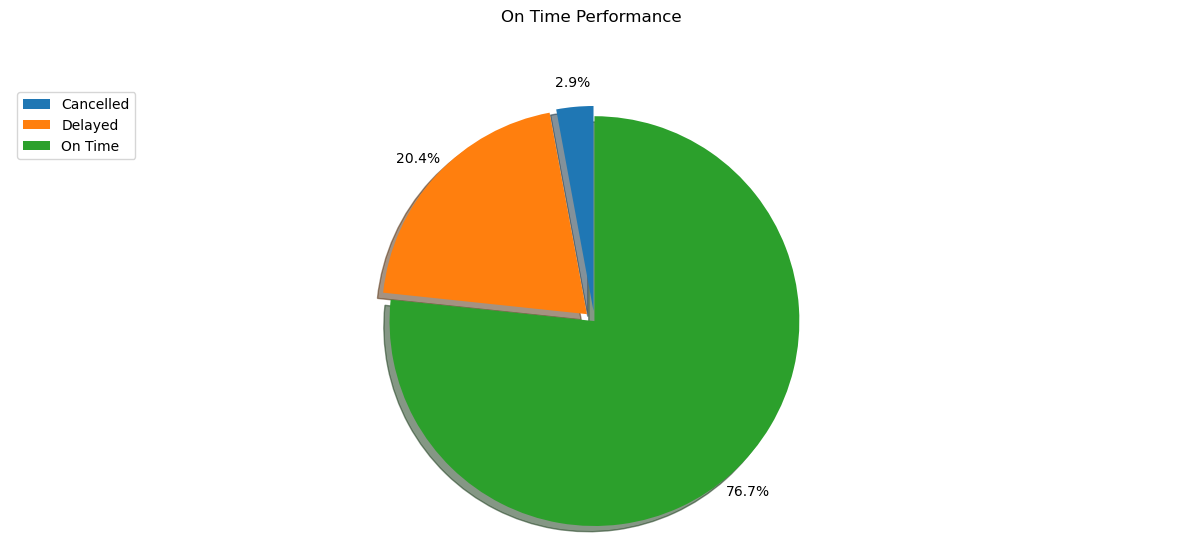

In [14]:
cancelled = df[df['CANCELLED'] != 0]

delayed = df[(df['CANCELLED']==0) & (df['DEP_DELAY']>15)]
ontime = df[(df['CANCELLED']==0) & (df['DEP_DELAY']<=15)]
cancelled_count = cancelled.shape[0]
delayed_count = delayed.shape[0]
ontime_count = ontime.shape[0]
explode_list = [0.05, 0.05, 0.0]

plt.figure(figsize=(15, 6))

labels = ['Cancelled', 'Delayed', 'On Time']
sizes = [cancelled_count, delayed_count, ontime_count]
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, shadow=True, explode=explode_list, pctdistance=1.12)
plt.axis('equal') 
plt.title('On Time Performance', y=1.12)
plt.legend(labels=labels, loc='upper left') 
plt.show()

<p>In 2022, the majority of American Airlines flights take off on time, accounting for 76.7%. 20.4% of total flight traffic was delayed for a period of at least 15 minutes. And 2.9% of the airline's flights were canceled. </p>
<p>The American Airlines' on-time rate is average compared to other airlines in the same region. Additionally, we must examine and delve further into data pertaining to canceled or delayed flights in 2022 in order to prevent such undesirable outcome.</p>

<h3>4.2. Cancelled Flight</h3>

In [15]:
counts = cancelled['CANCELLATION_REASON'].value_counts()
percs = cancelled['CANCELLATION_REASON'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
CANCELLATION_REASON,,
Weather Cancellation,15412,60.9%
Carrier Cancellation,8594,34.0%
National Air System Cancellation,1301,5.1%
Security Cancellation,2,0.0%


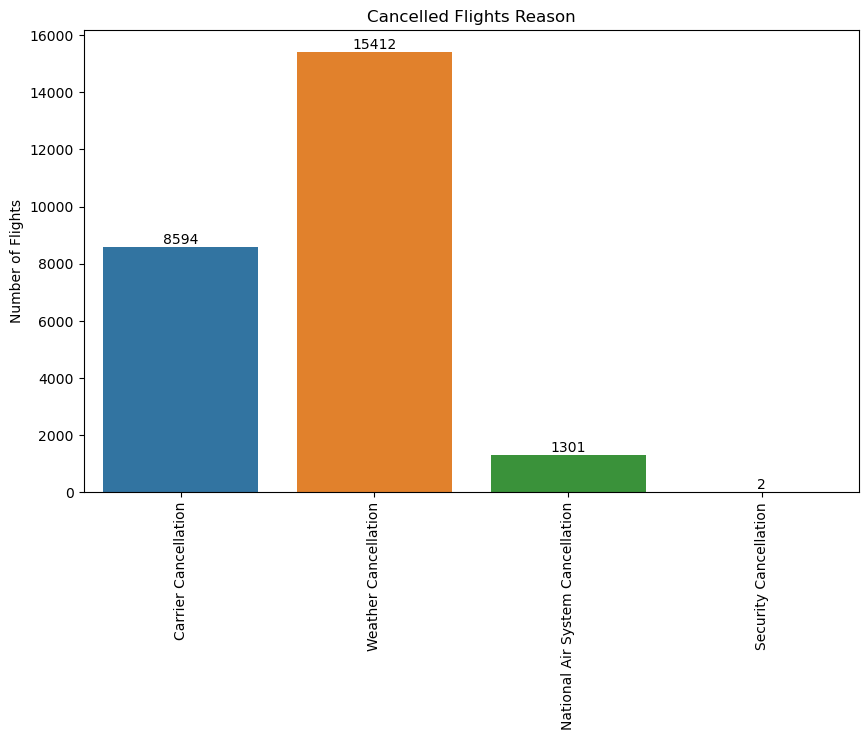

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CANCELLATION_REASON',  data=cancelled)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.xlabel(None)
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.title('Cancelled Flights Reason')
plt.show()

<p>By observing and analyzing the chart of the causes of American Airlines flight cancellations, we can see that the majority of flights were canceled due to weather reasons with 15,412 flights accounting for 60.9% of the airline's flights. Weather reasons are also the most common cause of flight cancellations for the aviation industry in the world in general and airlines in the region in particular. </p>
<p> The remaining reasons leading to the cancellation of a flight include Carrier Cancellation, National Air System Cancellation and Security Cancellation. In which the following two reasons account for an insignificant proportion. For Carrier Cancellation, there are many reasons why airlines cancel flights such as lack of personnel, problems with machinery and equipment, or it can also be due to predicted bad weather that causes the airline to proactively cancel flights. </p>

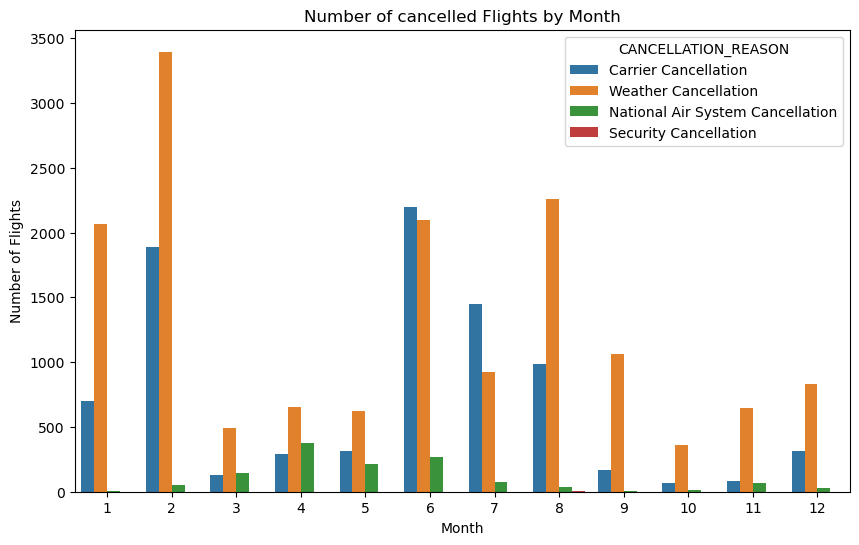

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MONTH', hue='CANCELLATION_REASON', data=cancelled)
plt.xlabel('Month')
# plt.text(1, 3450, '2022 Winter Storm Landon')
plt.ylabel('Number of Flights')
plt.title('Number of cancelled Flights by Month')
plt.show()

<p>The accompanying figure illustrates how the number of canceled flights varies unevenly throughout the year. The months of January, February, June, July, and August have the highest concentration of canceled flights; in February, there were almost 5,000 flights canceled. </p>
<p>A contributing factor to this pattern is the unfavorable winter and summer weather. If there are not any extreme weather phenomena, summer tends to have more bad weather conditions than winter, with thunderstorms as one of the most likely weather events to disrupt travel. When severe thunderstorms reach high altitudes, planes cannot fly above them and must change routes to go around the storms.A notable distinction exists in 2022, though, as Winter Storm Landon makes landfall early in February, leading to an abrupt spike in the number of flights canceled.</p>
<p>The association between Carrier Cancellation and Weather Cancellation is also displayed on the chart. This occurs for the previously stated reason: Anticipated inclement weather may lead to Carrier Cancellation.</p>

<h3>4.3. Non-cancelled Flights</h3>

(-30.0, 40.0)

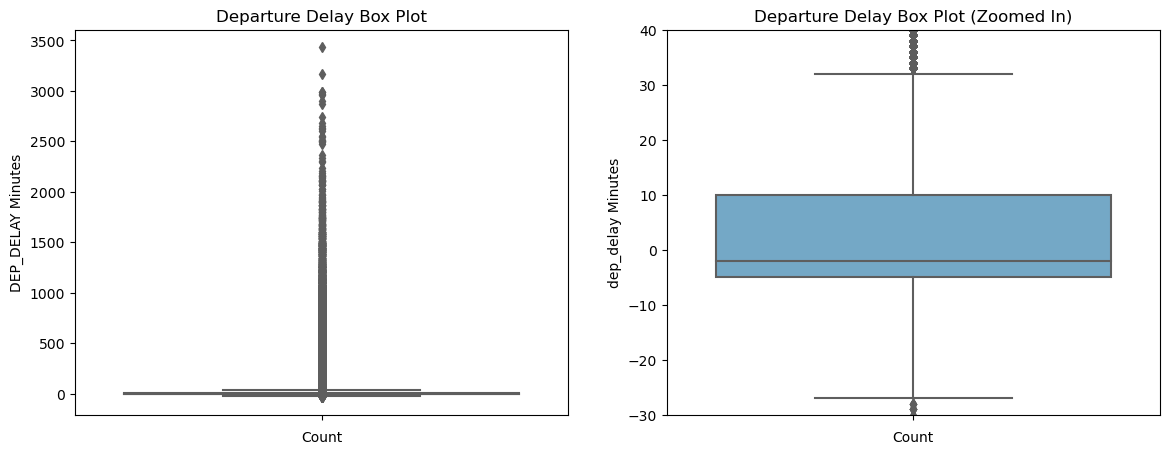

In [18]:
import matplotlib.gridspec as gridspec
non_cancel = df[(df['CANCELLED']==0)]
fig = plt.figure(figsize=(14, 5))

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2])
# Box plot left
ax1 = plt.subplot(gs[0])
ax1.set_title('Departure Delay Box Plot')
sns.boxplot(y=non_cancel["DEP_DELAY"], ax=ax1, color="#66acd4")
ax1.set_xlabel("Count")
ax1.set_ylabel("DEP_DELAY Minutes")

# Box plot right
ax2 = plt.subplot(gs[1])
ax2.set_title('Departure Delay Box Plot (Zoomed In)')
sns.boxplot(y=non_cancel["DEP_DELAY"], ax=ax2, color="#66acd4")
ax2.set_xlabel("Count")
ax2.set_ylabel("dep_delay Minutes")
ax2.set_ylim(-30, 40)

<p>There are a few outliers with large departure delay times, as can be seen from the display of the Departure Delay feature using both box plots.
</p>
<p></p>

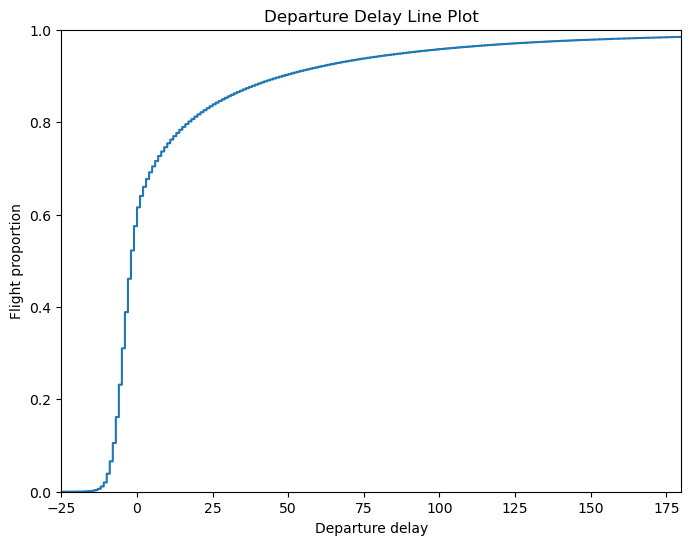

Percentage of delayed flight under 180 mins: 98.45552329652956%


In [19]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=non_cancel, x='DEP_DELAY')
plt.xlim([-25, 180])
plt.xlabel('Departure delay')
plt.ylabel('Flight proportion')
plt.title('Departure Delay Line Plot')
plt.show()

print('Percentage of delayed flight under 180 mins: ' + str((non_cancel['DEP_DELAY'] <= 180).mean() * 100) + '%')

<p>The number of flights delayed for more than 180 minutes makes up a relatively small part of the total number of delayed flights.
To determine the cause, we will still examine these flights separately.</p>

In [20]:
delay_180 = non_cancel[non_cancel['DEP_DELAY']>180]
delay_180 = delay_180[['MONTH','DEP_DELAY']]

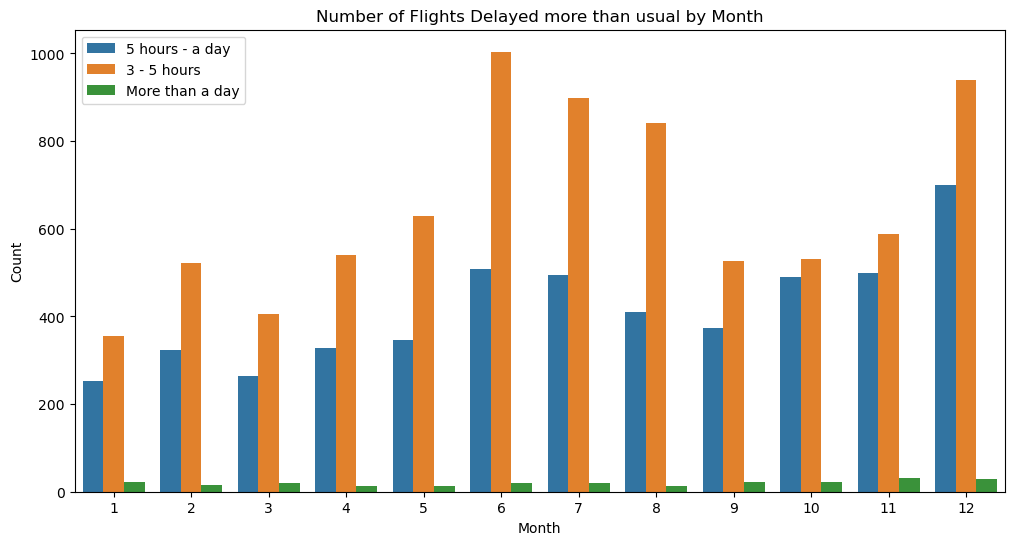

In [21]:
conditions = [
    (delay_180['DEP_DELAY'] <= 300),
    (delay_180['DEP_DELAY'] > 300) & (delay_180['DEP_DELAY'] <= 1440),
    (delay_180['DEP_DELAY'] > 1440)
    ]

# create a list of the values to assign for each condition
values = ['3 - 5 hours', '5 hours - a day', 'More than a day']

# create a new column
delay_180['RANK'] = np.select(conditions, values)

plt.figure(figsize=(12, 6))

sns.countplot(data=delay_180, x='MONTH', hue='RANK')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Flights Delayed more than usual by Month')
plt.legend(loc='best')
plt.show()

<p>This graph makes it evident how many flights experience delays of at least 180 minutes. June, July, August, and December are the summer and winter months when most of these delayed flights occur. This will be an important aspect to note because December has a lot of flights that are delayed for extended periods. </p>

Text(0, 0.5, 'Mean Delay time')

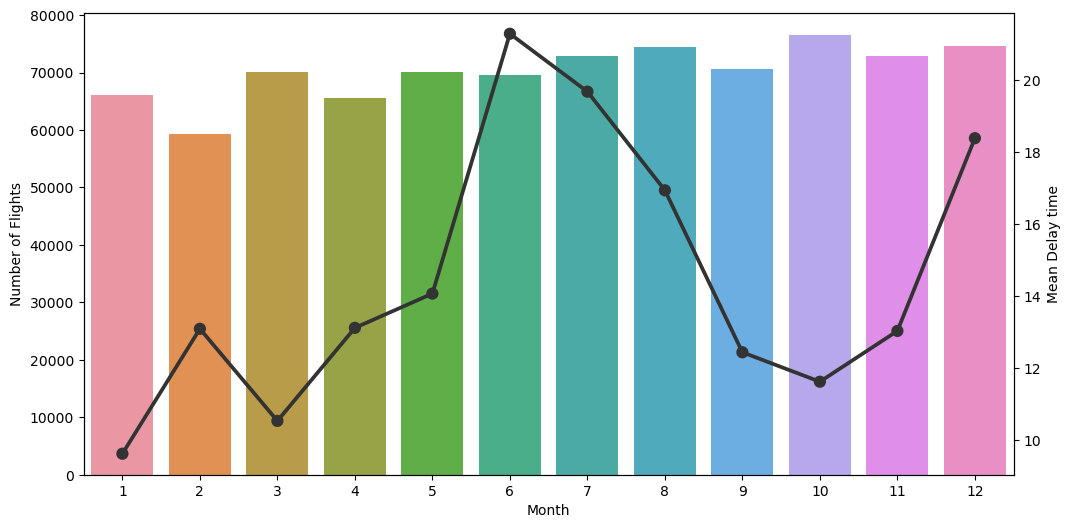

In [22]:
fig, ax1 = plt.subplots(figsize=(12, 6))

df_line = non_cancel.copy()
df_line['DEP_DELAY'] = [delay if delay > 0 else 0 for delay in df_line['DEP_DELAY']]
df_line['DEP_DELAY'] = [delay if delay <180 else 180 for delay in df_line['DEP_DELAY']]
df_line = df_line.groupby('MONTH')['DEP_DELAY'].agg(['count', 'mean'])
df_line.reset_index(inplace=True)
sns.barplot(x='MONTH', y='count', data=df_line, ax=ax1) # on primary ax1
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Flights")

ax2 = ax1.twinx() # secondary y-axis
sns.pointplot(x='MONTH', y='mean', color='#333', data=df_line, ax=ax2) # on secondary ax2
ax2.set_ylabel("Mean Delay time")

<p>Early flights are considered non-delayed.</p>
<p>Any flight that is delayed by more than 180 minutes will only be counted as 180 minutes delay to avoid errors when calculating the average flight delay time.</p>

<p>The chart shows a range of 65,000 to 75,000 flights per month, illustrated the consistency of the number of flights. February, with fewer than 60,000 trips, is the exception. This directly resulted from February having the greatest number of canceled flights of the year.</p>

<p>I will investigate further and examine each of these months independently in order to determine the cause of the peak in flight delays in June, July, and December. </p>

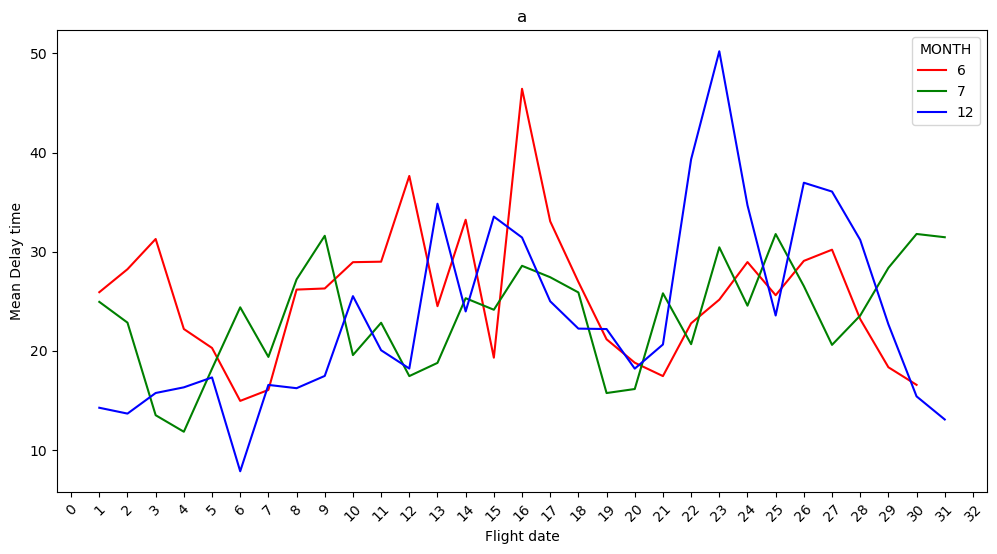

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
df_jun_jul_dec = non_cancel.copy()
df_jun_jul_dec = df_jun_jul_dec[(df_jun_jul_dec['MONTH'] == 12)|(df_jun_jul_dec['MONTH'] == 6)|(df_jun_jul_dec['MONTH'] == 7)]
df_jun_jul_dec['DEP_DELAY'] = [delay if delay > 0 else 0 for delay in df_jun_jul_dec['DEP_DELAY']]
# df_jun_jul_dec['DEP_DELAY'] = [delay if delay <180 else 180 for delay in df_jun_jul_dec['DEP_DELAY']]
df_jun_jul_dec=df_jun_jul_dec.groupby(['MONTH','DAY'])['DEP_DELAY'].mean().reset_index()
sns.lineplot(x='DAY', y='DEP_DELAY',hue=df_jun_jul_dec['MONTH'], data=df_jun_jul_dec, palette=['r', 'g', 'b'])
plt.xlabel('Flight date')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
plt.xticks(rotation=45)
plt.ylabel('Mean Delay time')
plt.title('a')
plt.show()

<p>First and foremost, compared to other months, there is a noticeable difference in the average number of days with flight delays between June and July. On the other hand, there are significant variations in travel sluggish times between days in December.  </p>
<p>These patterns can be explained by the following factors: </p>
   <p> - Summertime frequently brings increased travel demand and adverse weather, which increases travel times.</p>

  <p>  - December: Many flights are delayed for a considerable amount of time on December 22 and 24 owing to the impact of Winter Storm Elliott.</p>

<h2>4.4. Conclusions and Recommendations</h2>

<p> We can see trends in airline delays by month, although there is no certain solution to stop every delay, there are, nevertheless, methods to make improvements in order to reduce wait times or partially prevent delays. </p>
    <ul>
        <li>Distribute the number of flights evenly throughout several time frames during the day.</li>
        <li>Encourage clients to travel during off-peak hours by offering incentive programs.</li>
        <li>Keep up-to-date on weather trends and use meteorological forecasts to avoid flying under bad weather conditions.      </li>
        <li>The airline can use countermeasures like wet lease or dry lease to prevent a shortage of planes and personnel to staff the busiest travel season.</li>
    </ul>